<center style="font-size:40px">Modeling for Sentiment Analysis</center>

<center style="font-size:20px">By Jingjing Guo </center>

 <center style="font-size:20px">April 1 2023 </center>

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# import warnings

In [2]:
path = "Apple-Twitter-Sentiment-DFE.csv"

# Data Preparation

## Data cleaning

In [3]:
apple_data = pd.read_csv(path, encoding='ISO-8859-1')

In [4]:
apple_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3886 entries, 0 to 3885
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   _unit_id              3886 non-null   int64  
 1   _golden               3886 non-null   bool   
 2   _unit_state           3886 non-null   object 
 3   _trusted_judgments    3886 non-null   int64  
 4   _last_judgment_at     3783 non-null   object 
 5   sentiment             3886 non-null   object 
 6   sentiment:confidence  3886 non-null   float64
 7   date                  3886 non-null   object 
 8   id                    3886 non-null   float64
 9   query                 3886 non-null   object 
 10  sentiment_gold        103 non-null    object 
 11  text                  3886 non-null   object 
dtypes: bool(1), float64(2), int64(2), object(7)
memory usage: 337.9+ KB


In [5]:
data = apple_data[["sentiment", "text"]]
data.head(5)

,sentiment,text
0,3,#AAPL:The 10 best Steve Jobs emails ever...htt...
1,3,RT @JPDesloges: Why AAPL Stock Had a Mini-Flas...
2,3,My cat only chews @apple cords. Such an #Apple...
3,3,I agree with @jimcramer that the #IndividualIn...
4,3,Nobody expects the Spanish Inquisition #AAPL


## Exploratory Data Analysis

### Classes

<AxesSubplot:>

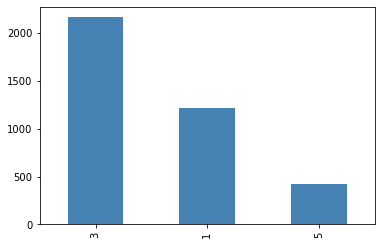

In [169]:
data['sentiment'].value_counts().plot.bar(color = 'steelblue', figsize = (6, 4))

In [20]:
data = data[data['sentiment']!='not_relevant']

In [21]:
data.groupby('sentiment').describe()

text                                                               
          count unique                                                top freq
sentiment                                                                     
1          1219   1102  RT @OneRepublic: Studio at 45,000 ft.  One out...   71
3          2162   1681  RT @OneRepublic: Studio at 45,000 ft.  One out...  232
5           423    379  RT @shannonmmiller: Love the @Apple is support...   19

### Top words

Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 30')

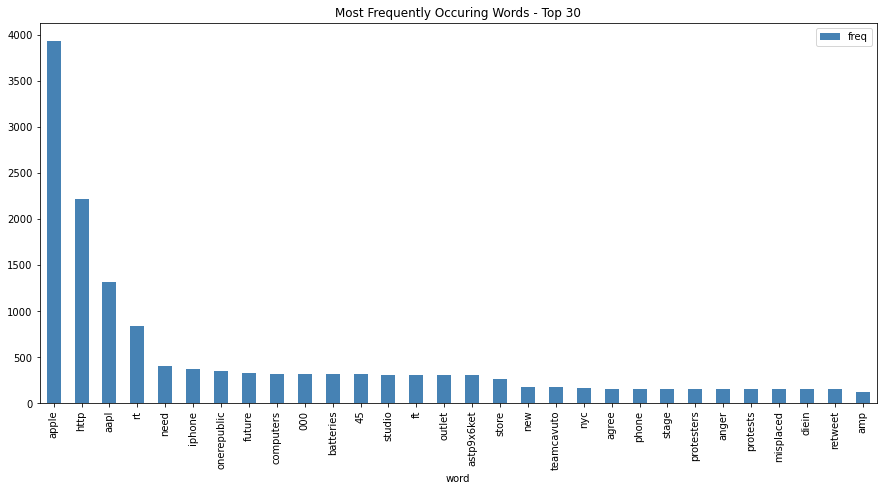

In [170]:
from sklearn.feature_extraction.text import CountVectorizer


cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(data.text)

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'steelblue')
plt.title("Most Frequently Occuring Words - Top 30")


### Wordclouds

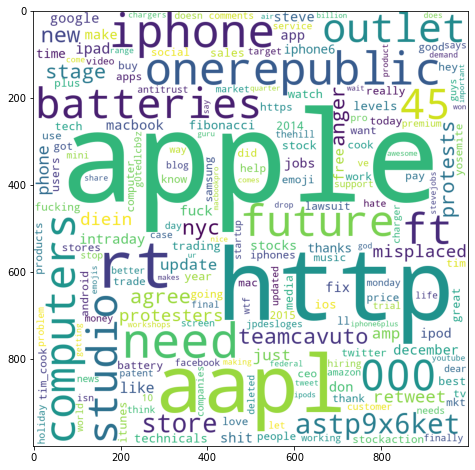

In [193]:
from wordcloud import WordCloud

wordcloud = WordCloud(background_color = 'white', width = 1000, height = 1000).generate_from_frequencies(dict(words_freq))

plt.figure(figsize=(10,8))
plt.imshow(wordcloud)

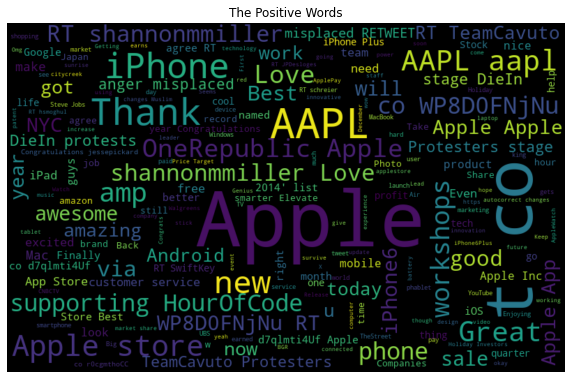

In [194]:
normal_words =' '.join([text for text in data['text'][data['sentiment'] == "5"]])

wordcloud = WordCloud(width=800, height=500, random_state = 0, max_font_size = 110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Positive Words')
plt.show()


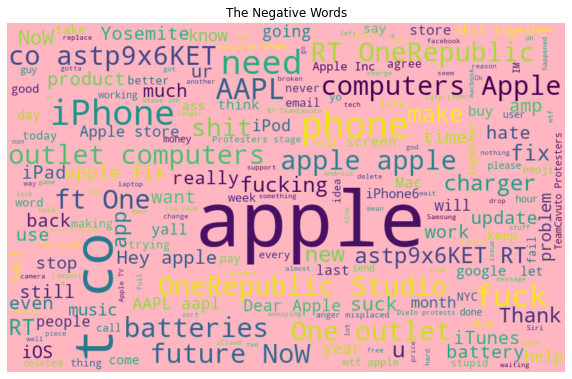

In [26]:
negative_words =' '.join([text for text in data['text'][data['sentiment'] == "1"]])

wordcloud = WordCloud(background_color = 'lightpink', width=800, height=500, random_state = 0, max_font_size = 110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Negative Words')
plt.show()


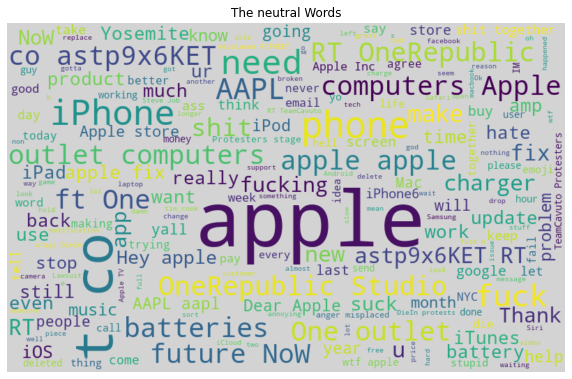

In [27]:
neutral_words =' '.join([text for text in data['text'][data['sentiment'] == "3"]])

wordcloud = WordCloud(background_color = 'lightgrey', width=800, height=500, random_state = 0, max_font_size = 110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The neutral Words')
plt.show()

# Modeling

## Train Test split

In [65]:
from sklearn.model_selection import train_test_split
import pandas as pd

# split the data into features (X) and target variable (y)
X_with_label = data
X = data.drop('sentiment', axis=1)
y = data['sentiment']


# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_with_label, y, test_size=0.2, random_state=42)


In [98]:
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)

In [99]:
print(X_train.shape)
print(X_test.shape)

(3043, 3)
(761, 3)


In [67]:
X_train.head()

,sentiment,text
1658,3,"RT @OneRepublic: Studio at 45,000 ft. One out..."
3489,3,Just received my @auugmotionsynth. Just gotta ...
255,1,RT @laurrynk: Dear @apple replace my phone my ...
1930,3,@dimu4ever @timcook @apple help for wetin? Lol
755,3,Why Even Apple Is Surprised by the Enormous De...


In [68]:
X_test.head()

,sentiment,text
2060,3,#AAPL:New 4-inch iPhone 6 Reported. 5 Reasons ...
543,3,@jengolbeck @Apple agreed
494,1,.@Sony named 'most-desired brand' during #Blac...
1721,5,@OneRepublic @Apple I spy a pair of M50s @USAu...
1690,1,"RT @OneRepublic: Studio at 45,000 ft. One out..."


In [69]:
X_train.isnull().any()
X_test.isnull().any()

sentiment    False
text         False
dtype: bool

## Feature Engineering

<AxesSubplot:>

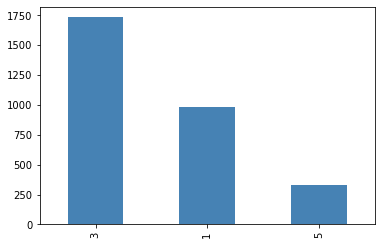

In [73]:
X_train["sentiment"].value_counts().plot.bar(color = 'steelblue', figsize = (6, 4))

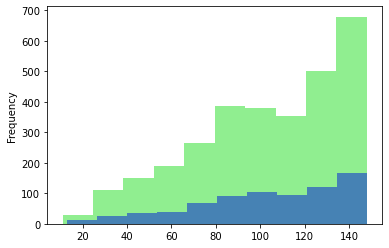

In [74]:
length_train = X_train['text'].str.len().plot.hist(color = 'lightgreen', figsize = (6, 4))
length_test = X_test['text'].str.len().plot.hist(color = 'steelblue', figsize = (6, 4))

In [75]:
# adding a column to represent the length of the tweet

X_train['len'] = X_train['text'].str.len()
X_test['len'] = X_test['text'].str.len()

X_train.head(10)

,sentiment,text,len
1658,3,"RT @OneRepublic: Studio at 45,000 ft. One out...",139
3489,3,Just received my @auugmotionsynth. Just gotta ...,87
255,1,RT @laurrynk: Dear @apple replace my phone my ...,59
1930,3,@dimu4ever @timcook @apple help for wetin? Lol,46
755,3,Why Even Apple Is Surprised by the Enormous De...,103
521,3,Apple Releases Final Cut Pro 10.1.4 and Xcode ...,91
1687,3,@OneRepublic @Apple You haven't figured out ...,90
1204,1,Well thanks @apple for losing over 5000 of my ...,132
3254,3,RT @adage: Watch the weekend's new TV ads from...,98
3350,1,@TeamCavuto @Apple At this point it's not ange...,87


In [77]:
# collecting the hashtags

def hashtag_extract(x):
    hashtags = []
    
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [78]:
import re
import nltk

In [201]:
# extracting hashtags from positive, neutral and negative
HT_positive = hashtag_extract(X_train['text'][X_train["sentiment"] == "5"])
HT_neutral = hashtag_extract(X_train['text'][X_train["sentiment"] == "3"])
HT_negative = hashtag_extract(X_train['text'][X_train["sentiment"] == "1"])

# unnesting list
HT_positive = sum(HT_positive,[])
HT_neutral = sum(HT_neutral,[])
HT_negative = sum(HT_negative,[])

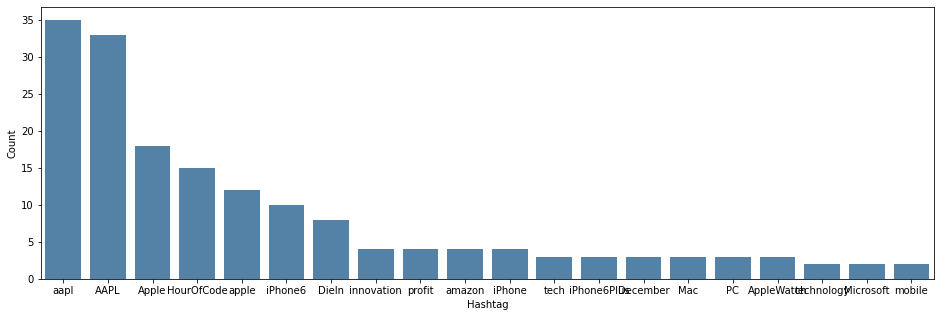

In [202]:
a = nltk.FreqDist(HT_positive)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count", color='steelblue')
ax.set(ylabel = 'Count')
plt.show()

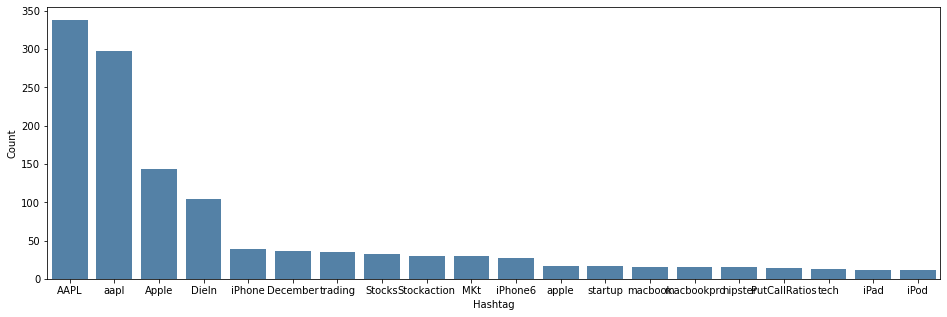

In [203]:
a = nltk.FreqDist(HT_neutral)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count", color='steelblue')
ax.set(ylabel = 'Count')
plt.show()

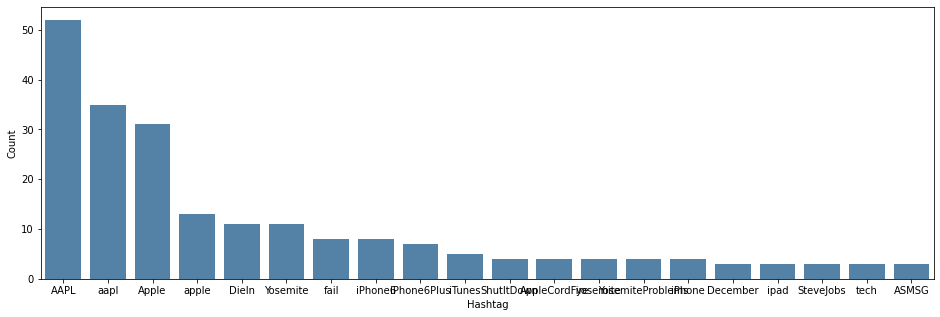

In [204]:
a = nltk.FreqDist(HT_negative)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count", color='steelblue')
ax.set(ylabel = 'Count')
plt.show()

In [205]:
# create numerical vectors of text in train set
tokenized_tweet = X_train['text'].apply(lambda x: x.split()) 

# importing gensim
import gensim

# creating a word to vector model
model_w2v = gensim.models.Word2Vec(
            tokenized_tweet,
#             size=200, # desired no. of features/independent variables 
            window=5, # context window size
            min_count=2,
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 2, # no.of cores
            seed = 34)

model_w2v.train(tokenized_tweet, total_examples= len(X_train['text']), epochs=20)

(595502, 930220)

In [206]:
model_w2v.wv.most_similar(positive = "company")

[('innovative', 0.8909187316894531),
 ('searched', 0.8331509232521057),
 ('enterprise', 0.7846968770027161),
 ('suing', 0.7781180739402771),
 ('iPhone.', 0.7721884250640869),
 ('beats', 0.7658225297927856),
 ('official', 0.7651165127754211),
 ('reported', 0.7650619149208069),
 ('integration', 0.7645488977432251),
 ('quite', 0.7620034217834473)]

In [207]:
model_w2v.wv.most_similar(positive = "good")

[('too', 0.8442679643630981),
 ('Street', 0.8306574821472168),
 ('words', 0.8297710418701172),
 ('pain', 0.8280456066131592),
 ('dismiss', 0.8164639472961426),
 ('macs', 0.8132717609405518),
 ('out.', 0.8131712675094604),
 ('key', 0.8114663362503052),
 ('care', 0.8105373382568359),
 ('call.', 0.8098666667938232)]

In [209]:
model_w2v.wv.most_similar(positive = "thanks")

[('@umo_games', 0.8363903760910034),
 ('tired', 0.8153027296066284),
 ('month', 0.8134878873825073),
 ('number', 0.8124295473098755),
 ('almost', 0.8118578195571899),
 ('ever.', 0.8081051707267761),
 ('Well', 0.807989239692688),
 ('600', 0.807383120059967),
 ('breaking', 0.8071527481079102),
 ('ruined', 0.8036417961120605)]

In [210]:
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")

In [211]:
from gensim.models.doc2vec import TaggedDocument

In [212]:
def add_label(twt):
    output = []
    for i, s in zip(twt.index, twt):
        output.append(TaggedDocument(s, ["tweet_" + str(i)]))
    return output

# label all the tweets
labeled_tweets = add_label(tokenized_tweet)

labeled_tweets[:6]

[TaggedDocument(words=['RT', '@OneRepublic:', 'Studio', 'at', '45,000', 'ft.', 'One', 'outlet,', '4', 'computers.', '@Apple', 'we', 'need', 'the', 'batteries', 'of', 'the', 'future', 'NoW!!!!', 'http://t.co/astp9x6KET'], tags=['tweet_0']),
 TaggedDocument(words=['Just', 'received', 'my', '@auugmotionsynth.', 'Just', 'gotta', 'wait', 'for', '@apple', 'to', 'approve', 'their', 'app', 'now!'], tags=['tweet_1']),
 TaggedDocument(words=['RT', '@laurrynk:', 'Dear', '@apple', 'replace', 'my', 'phone', 'my', 'battery', 'sucks'], tags=['tweet_2']),
 TaggedDocument(words=['@dimu4ever', '@timcook', '@apple', 'help', 'for', 'wetin?', 'Lol'], tags=['tweet_3']),
 TaggedDocument(words=['Why', 'Even', 'Apple', 'Is', 'Surprised', 'by', 'the', 'Enormous', 'Demand', 'for', 'the', 'iPhone', '6', '$AAPL', '#aapl', 'http://t.co/rwGf20VByx'], tags=['tweet_4']),
 TaggedDocument(words=['Apple', 'Releases', 'Final', 'Cut', 'Pro', '10.1.4', 'and', 'Xcode', '6.1.1', '[Mac', 'Blog]', 'http://t.co/LjOSIwSpy7', '#AA

In [89]:
# removing stopwords

import re
import nltk

nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer


[nltk_data] Downloading package stopwords to /Users/jg/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [90]:
X_train

,sentiment,text,len
1658,3,"RT @OneRepublic: Studio at 45,000 ft. One out...",139
3489,3,Just received my @auugmotionsynth. Just gotta ...,87
255,1,RT @laurrynk: Dear @apple replace my phone my ...,59
1930,3,@dimu4ever @timcook @apple help for wetin? Lol,46
755,3,Why Even Apple Is Surprised by the Enormous De...,103
...,...,...,...
1162,5,Loving the OS update for my Mac! #Yosemite @Apple,49
1327,1,Done with this iPhone 6 plus Apple or sprint g...,117
886,5,Got to hear about the new patent by apple ... ...,138
3585,3,@Apple Is Already Building Its Next Massive Bu...,108


In [104]:
train_corpus = []

for i in range(0, 3043):
    review = re.sub('[^a-zA-Z]', ' ', X_train['text'][i])
    review = review.lower()
    review = review.split()

    ps = PorterStemmer()

    # stemming
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]

    # joining them back with space
    review = ' '.join(review)
    train_corpus.append(review)

In [106]:
test_corpus = []

for i in range(0, 761):
    review = re.sub('[^a-zA-Z]', ' ', X_test['text'][i])
    review = review.lower()
    review = review.split()
  
    ps = PorterStemmer()
  
    # stemming
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
  
    # joining them back with space
    review = ' '.join(review)
    test_corpus.append(review)

In [129]:
# creating bag of words

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 2500)
x = cv.fit_transform(train_corpus).toarray()
y = X_train.iloc[:, 0].astype(int)

print(x.shape)
print(y.shape)


(3043, 2500)
(3043,)


In [130]:
# creating bag of words

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 2500)
x_test = cv.fit_transform(test_corpus).toarray()

print(x_test.shape)


(761, 2500)


## Experiments

In [131]:
# splitting the training data into train and valid sets

from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size = 0.25, random_state = 42)

print(x_train.shape)
print(x_valid.shape)
print(y_train.shape)
print(y_valid.shape)

(2282, 2500)
(761, 2500)
(2282,)
(761,)


In [132]:
# standardization

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_valid = sc.transform(x_valid)
x_test = sc.transform(x_test)


### Random Forest

In [133]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

model = RandomForestClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)
print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_valid, y_valid))

Training Accuracy : 0.9645048203330412
Validation Accuracy : 0.7490144546649146


In [137]:
# confusion matrix
cm = confusion_matrix(y_valid, y_pred)
print(cm)

[[143  91   6]
 [ 31 399  15]
 [  9  39  28]]


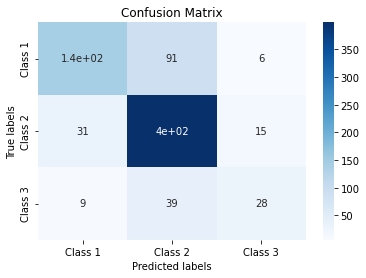

In [138]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# from sklearn.metrics import confusion_matrix

# Assuming y_true and y_pred are the true and predicted labels, respectively
# cm = confusion_matrix(y_true, y_pred)
labels = ['Class 1', 'Class 2', 'Class 3']

# Create heatmap
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=labels, yticklabels=labels)

# Add labels and title
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')

# Show plot
plt.show()


### Logistic Regression

In [139]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_valid, y_valid))




Training Accuracy : 0.9605609114811569
Validation Accuracy : 0.7293035479632063
[[153  71  16]
 [ 45 371  29]
 [ 11  34  31]]


/opt/anaconda3/envs/vis/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


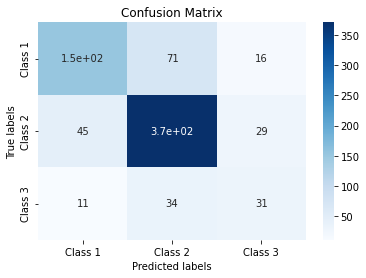

### Decision Tree

In [141]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_valid, y_valid))


Training Accuracy : 0.9645048203330412
Validation Accuracy : 0.7082785808147175


[[132  89  19]
 [ 42 373  30]
 [  8  34  34]]


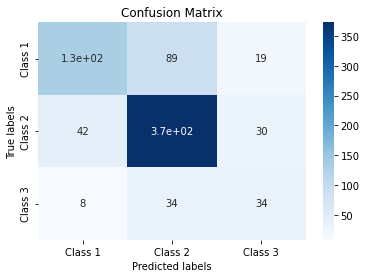

In [142]:
# confusion matrix
cm = confusion_matrix(y_valid, y_pred)
print(cm)

# Create heatmap
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=labels, yticklabels=labels)

# Add labels and title
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')

# Show plot
plt.show()

### SVM

In [ ]:
## from sklearn.svm import SVC

model = SVC()
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_valid, y_valid))

[[101 139   0]
 [ 24 417   4]
 [  7  60   9]]


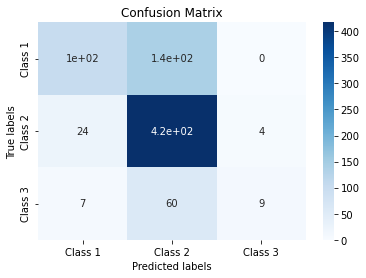

In [144]:
# confusion matrix
cm = confusion_matrix(y_valid, y_pred)
print(cm)

# Create heatmap
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=labels, yticklabels=labels)

# Add labels and title
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')

# Show plot
plt.show()

### XGboost

In [ ]:
# import math
y_train_xgb = y_train.apply(lambda v: math.floor(int(v)/2))
y_valid_xgb = y_valid.apply(lambda v: math.floor(int(v)/2))

In [166]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(x_train, y_train_xgb)

y_pred = model.predict(x_valid)

print("Training Accuracy :", model.score(x_train, y_train_xgb))
print("Validation Accuracy :", model.score(x_valid, y_valid_xgb))


Training Accuracy : 0.8720420683610868
Validation Accuracy : 0.7647831800262812


[[150  80  10]
 [ 31 401  13]
 [  9  36  31]]


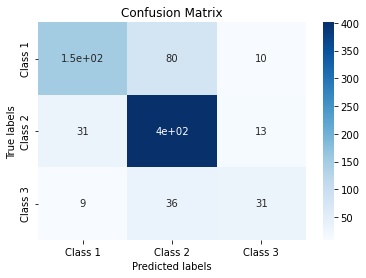

In [168]:
# confusion matrix
cm = confusion_matrix(y_valid_xgb, y_pred)
print(cm)

# Create heatmap
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=labels, yticklabels=labels)

# Add labels and title
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')

# Show plot
plt.show()

# Final Model 

In [189]:
y_test_xgb = y_test.apply(lambda v: math.floor(int(v)/2))

In [190]:
y_test_pred = model.predict(x_test)

In [191]:
print("test Accuracy :", model.score(x_test, y_test_xgb))

test Accuracy : 0.33377135348226017


[[218  10  10]
 [389  35   5]
 [ 84   9   1]]


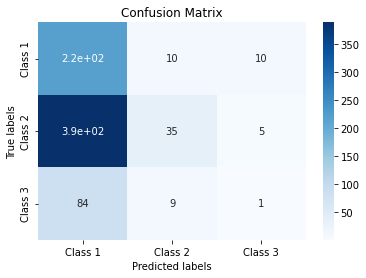

In [192]:
# confusion matrix
cm = confusion_matrix(y_test_xgb, y_test_pred)
print(cm)

# Create heatmap
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=labels, yticklabels=labels)

# Add labels and title
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')

# Show plot
plt.show()